# Setup and Load Data

1.1 Install Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.2 Load Data

In [3]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dataset2'
os.listdir(data_dir)

['fresh', 'good', 'notfeasible']

In [4]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dataset2')

Found 540 files belonging to 3 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
# Get another batch from the iterator
batch = data_iterator.next()

In [7]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [8]:
# 0 = fresh || 1 = good || 2 = notfeasible

batch[1]

array([0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 1, 2, 2, 2, 0, 1, 0, 2, 0], dtype=int32)

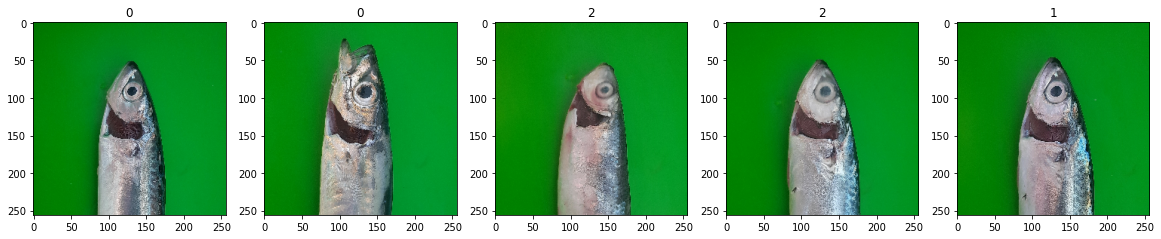

In [9]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Pre-process Data

2.1 Scale Data

In [10]:
data = data.map(lambda x, y: (x/255, y))

2.2 Split Data

In [11]:
len(data)

17

In [12]:
train_size = int(len(data)*.6)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [15]:
test_size

3

In [16]:
train_size+val_size+test_size

17

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

3.1 Build Deep Learning Model

In [18]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

3.2 Train

In [21]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, validation_data=val, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
11/11 [==============================] - 69s 6s/step - loss: 1.3037 - accuracy: 0.3722 - val_loss: 1.0964 - val_accuracy: 0.4167
Epoch 2/10
11/11 [==============================] - 17s 1s/step - loss: 1.0904 - accuracy: 0.3239 - val_loss: 1.0571 - val_accuracy: 0.6875
Epoch 3/10
11/11 [==============================] - 17s 1s/step - loss: 1.0031 - accuracy: 0.5710 - val_loss: 1.0147 - val_accuracy: 0.5000
Epoch 4/10
11/11 [==============================] - 14s 1s/step - loss: 0.8375 - accuracy: 0.6619 - val_loss: 0.8876 - val_accuracy: 0.5625
Epoch 5/10
11/11 [==============================] - 17s 1s/step - loss: 0.7858 - accuracy: 0.6534 - val_loss: 0.6273 - val_accuracy: 0.7604
Epoch 6/10
11/11 [==============================] - 14s 1s/step - loss: 0.5325 - accuracy: 0.7869 - val_loss: 0.5090 - val_accuracy: 0.7188
Epoch 7/10
11/11 [==============================] - 16s 1s/step - loss: 0.3903 - accuracy: 0.8352 - val_loss: 0.3421 - val_accuracy: 0.8854
Epoch 8/10
11/11 [==

3.2 Plot Performance

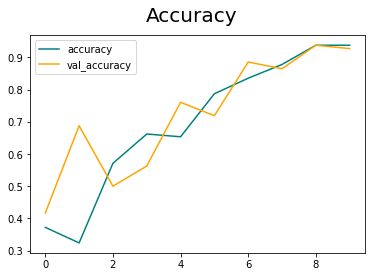

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

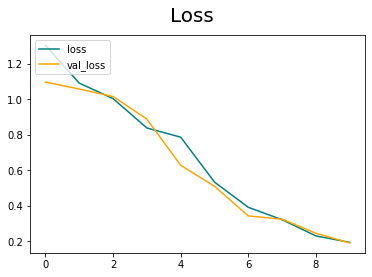

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

4.1 Evaluating on the Test Partition

In [24]:
model.evaluate(test)

3/3 [==============================] - 7s 111ms/step - loss: 0.1977 - accuracy: 0.9348


[0.1977093368768692, 0.9347826242446899]



---



---



4.2 Testing on New Data



*   Percobaan 1 (Banjar Segar)



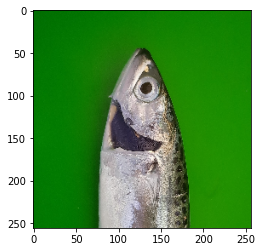

1/1 [==============================] - 0s 193ms/step


array([[0.6215476 , 0.37835458, 0.00009788]], dtype=float32)

In [25]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/test_newdata/banjar_segar.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Untuk menampilkan hasil dalam bentuk desimal
np.set_printoptions(suppress=True) 

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

# Convert to TensorFlow Lite

5.1 Save model

In [26]:
from tensorflow.keras.models import load_model

In [30]:
model.save(os.path.join('models', 'modelfix1.h5'))

5.2 Convert to tflite

In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

5.3 Save .tflite model

In [32]:
with open("modelfix1.tflite", "wb") as f:
  f.write(tflite_model)

In [33]:
tflite_model_path = "modelfix1.tflite"



---



---

